In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_28/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<img src="../../../common/logo_DH.png" align='left' width=50%/>

# Regresión Logística - Práctica Independiente
## Tabla de Contenidos

- [1. Introducción](#intro)
- [2. Predicción de enfermedades cardíacas](#pred)
    - [2.1. Descripción del dataset](#descripcion)
    - [2.2. EDA - Exploratory data analysis](#eda)
    - [2.3. Clasificación de pacientes](#clf)
        - [2.3.1. Preparación de los datos](#prep)
        - [2.3.2. Ajuste del modelo](#fit)
        - [2.3.3. Evaluación del modelo](#eval)
        - [2.3.4. Optimización del modelo](#opt)       


<a id="intro"></a>
## Introducción
En 1948 en Framingham, un pequeño pueblo en Massachusetts, Estados Unidos, comenzó uno de los estudios médicos más famosos de la historia y que aun continua vigente. El estudio, conocido también como Framingham Heart Study, consistió en la participación voluntaria de 3 generaciones de habitantes del pueblo, quienes fueron sometidos a estudios médicos regulares cada 3 a 5 años, generando un gran volumen de datos sobre la salud mental y física, especialmente de enfermedades cardiovasculares de todos los involucrados.<br>
Los aportes de este estudio son numerosos, entre los cuales se destacan las relaciones entre el riesgo de tener una enfermedad cardíaca con varios aspectos de la vida cotidiana y del estado de salud general de las personas, tales como la presión sanguínea, los niveles de colesterol, el consumo de cigarrillos y factores psico-sociales. El término "factor de riesgo" fue acuñado como parte de los hallazgos de este estudio. 
Para más información sobre el estudio se puede ingresar a su sitio web https://framinghamheartstudy.org/.
El dataset puede ser descargado de https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

<a id="pred"></a>
## Predicción de enfermedades cardíacas
En esta práctica trabajaremos con un extracto del dataset resultante del estudio, en el que se cuenta con información médica de varios participantes, entre la que se encuentra el riesgo de que esa persona tenga una enfermedad coronaria durante los próximos 10 años. Nos propondremos entrenar un regresor logístico que permita clasificar y identificar los pacientes en riesgo de tener este tipo de enfermedad basándonos en sus datos clínicos.

<a id="descripcion"></a>
### Descripción del dataset
El dataset cuenta con las siguientes variables:
- age: Edad.
- male: Género.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: Si la persona fuma o no
- cigsPerDay: la cantidad de cigarrillos que la persona fuma por día en promedio.
- BPMeds: si la persona consume medicación para la presión sanguínea.
- prevalentStroke: Si la persona tuvo un infarto anteriormente.
- prevalentHyp: si la persona tiene hipertensión.
- diabetes: si la persona tuvo diabetes.
- totChol: nivel de colesterol total.
- sysBP: presión sanguínea sistólica.
- diaBP:: presión sanguínea diastólica.
- BMI: índice de masa corporal.
- heartRate: frecuencia cardíaca.
- glucose: nivel de glucosa en sangre.
- TenYearCHD: si la persona está en riesgo de tener una enfermedad coronaria dentro de los próximos 10 años.

Para obtener más información sobre las variables, buscar en https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

<a id="eda"></a>
### EDA - Exploratory data analysis
Importar el dataset y realizar un análisis exploratorio del mismo. 
- ¿Cuántos registros hay?
- ¿Qué tipo de variable es cada una?
- ¿Hay valores faltantes?
- ¿Hay valores fuera del rango esperado?
- ¿En qué tipo de dato están almacenados?
- ¿Todas las variables son médicas o hay otra información en el dataset?
- ¿Hay correlación entre las variables?
- ¿En qué rango está cada una?
- Cómo son las proporciones de las variables categóricas?

Realizar las visualizaciones adecuadas para responder estas preguntas

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


¿Cuántos registros hay?

In [4]:
df.shape

(4240, 16)

¿Qué tipo de variable es cada una?

age: continua.

male: categorica nominal.

education: categorica ordinal.

currentSmoker: categorica nominal.

cigsPerDay: continua.

BPMeds: categorica nominal.

prevalentStroke: categorica nominal.

prevalentHyp: categorica nominal.

diabetes:categorica nominal.

totChol: continua.

sysBP: continua.

diaBP:: continua.

BMI: continua.

heartRate: continua.

glucose: continua.

TenYearCHD: categorica nominal. VARIABLE TARGET

¿Hay valores faltantes?

In [9]:
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

¿Hay valores fuera del rango esperado?

In [11]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


¿En qué tipo de dato están almacenados?

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


¿Hay correlación entre las variables?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.017415,0.197026,0.317143,-0.052504,-0.004550,0.005853,0.015693,-0.070413,-0.035879,0.058199,0.081871,-0.116932,0.005979,0.088374
age,-0.029014,1.000000,-0.166356,-0.213662,-0.192959,0.123052,0.057679,0.306799,0.101314,0.262554,0.394053,0.205586,0.136096,-0.012843,0.122356,0.225408
education,0.017415,-0.166356,1.000000,0.018528,0.008323,-0.010898,-0.035142,-0.081726,-0.038749,-0.023613,-0.129496,-0.061919,-0.137747,-0.054182,-0.035843,-0.054248
currentSmoker,0.197026,-0.213662,0.018528,1.000000,0.769774,-0.048927,-0.032980,-0.103710,-0.044285,-0.046488,-0.130281,-0.107933,-0.167857,0.062686,-0.056726,0.019448
cigsPerDay,0.317143,-0.192959,0.008323,0.769774,1.000000,-0.046155,-0.032711,-0.066645,-0.037089,-0.026479,-0.088797,-0.056715,-0.093293,0.075564,-0.058886,0.057755
BPMeds,-0.052504,0.123052,-0.010898,-0.048927,-0.046155,1.000000,0.117370,0.261067,0.052060,0.080623,0.254194,0.194122,0.100702,0.015230,0.051197,0.087519
prevalentStroke,-0.004550,0.057679,-0.035142,-0.032980,-0.032711,0.117370,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.025909,-0.017674,0.018440,0.061823
prevalentHyp,0.005853,0.306799,-0.081726,-0.103710,-0.066645,0.261067,0.074791,1.000000,0.077752,0.163632,0.696656,0.615840,0.301344,0.146815,0.086656,0.177458
diabetes,0.015693,0.101314,-0.038749,-0.044285,-0.037089,0.052060,0.006955,0.077752,1.000000,0.040348,0.111265,0.050260,0.087068,0.048986,0.617630,0.097344
totChol,-0.070413,0.262554,-0.023613,-0.046488,-0.026479,0.080623,0.000105,0.163632,0.040348,1.000000,0.208734,0.164698,0.115992,0.091127,0.046538,0.082369


In [17]:
df.corr()[['TenYearCHD']]

,TenYearCHD
male,0.088374
age,0.225408
education,-0.054248
currentSmoker,0.019448
cigsPerDay,0.057755
BPMeds,0.087519
prevalentStroke,0.061823
prevalentHyp,0.177458
diabetes,0.097344
totChol,0.082369


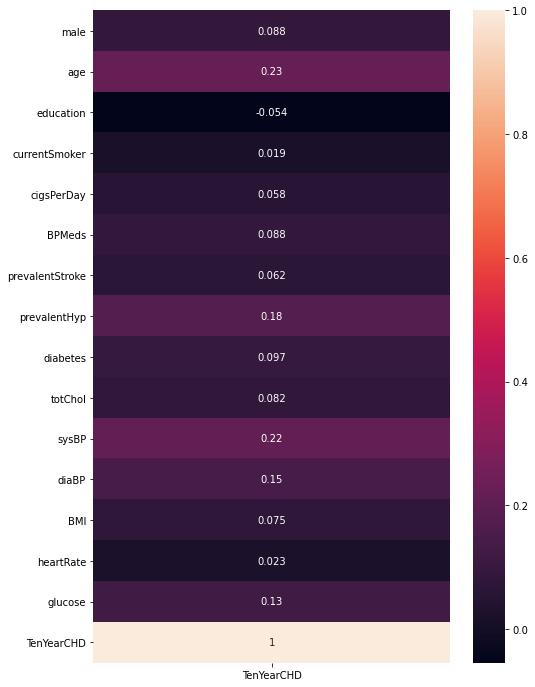

In [21]:
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['TenYearCHD']], annot=True)
plt.show()

¿En qué rango está cada una?

In [45]:
a = {'min':df.min(),
     'max':df.max()}
pd.DataFrame(a)

,min,max
male,0.00,1.0
age,32.00,70.0
education,1.00,4.0
currentSmoker,0.00,1.0
cigsPerDay,0.00,70.0
BPMeds,0.00,1.0
prevalentStroke,0.00,1.0
prevalentHyp,0.00,1.0
diabetes,0.00,1.0
totChol,107.00,696.0


<a id="clf"></a>
### Clasificación de pacientes
Ahora utilizaremos una regresión logística como clasificador de personas y el objetivo será etiquetar a aquellas que tengan riesgo de padecer una enfermedad coronaria en los próximos 10 años.
<a id="prep"></a>
#### Preparación de los datos
¿Qué debemos hacer con el dataset antes de entrenar el modelo?

In [47]:
# Primero debemos limpiar los datos nulos
df = df.dropna()


In [48]:
# Preparamos la matriz de features y el vector target

X = df.drop('TenYearCHD', axis=1)
y = df.TenYearCHD

<a id="fit"></a>
#### Ajuste del modelo

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify=y,random_state = 0)


In [58]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.15238789646372586, 0.15191256830601094)

In [59]:
# Vamos a estandarizar los datos para que la regularizacion que utiliza sklearn por default, sea correcta

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [61]:
model = LogisticRegression()
model.fit(X_train_std,y_train)

LogisticRegression()

<a id="eval"></a>
#### Evaluación del modelo
Con el modelo entrenado podemos comenzar a evaluar su performance y ver si podemos hacer algo para mejorarlo

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [68]:
y_pred = model.predict(X_test_std)

In [69]:
accuracy_score(y_test,y_pred)

0.8546448087431694

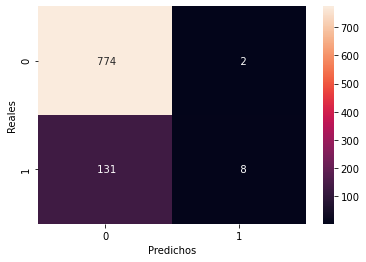

In [74]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()

VERDADEROS POSITIVOS = 8
VERDADEROS NEGATIVOS = 774
FALSOS POSITIVOS = 2
FALSOS NEGATIVOS = 131

ACCURACY = VP+VN / VP+VN+FP+FN
SPECIFY = VN / VN + FP

Observamos que hay una accuracy del 85%, pero que de los 139 casos positivos, sólo 8 (5.76%) están siendo detectados. Esto implica que nuestro clasificador le está diciendo a mucha gente que está fuera de peligro cuando en realidad no es así. Intentemos modificar el modelo para mejorar la predicción en estos casos

<a id="opt"></a>
#### Optimización del modelo

In [78]:
# Vamos a modificar el umbral de decision, que actualmente si es >= a .5, lo pone como clase positiva
# predict_proba nos da en la columna 0, la probabilidad de pertenecer a la clase 0 y columna 1, la prob de pert a la clase 1 (esta dentro del grupo de riesgo)
# Yo tengo que bajar el umbral de probabilidad

In [82]:
umbral_nuevo = 0.2
prob_grupo_riesgo = model.predict_proba(X_test_std)[:,1]

y_pred_nuevo = prob_grupo_riesgo > umbral_nuevo

accuracy_score(y_test,y_pred_nuevo)

0.7650273224043715

Observamos que bajo nuestro valor de accuracy

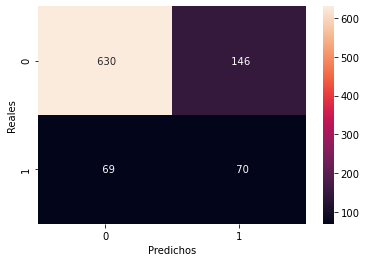

In [84]:
sns.heatmap(confusion_matrix(y_test,y_pred_nuevo), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.show()

Si bien, podemos ver que nuestra acc bajo del 85% al 76%, nuestros casos positivos predichos, aumentaron considerablemente de  8 (5.76%) a 70 (50%)